# Objective --> To perform customer segmentation using clustering techniques to group customers based on their purchasing behavior, allowing businesses to target each segment effectively.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
customers = pd.read_csv("D:\All Internships\MainFlow\DataSc with Python - Tasks\Dataset\Mall_Customers.csv")
customers

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
customers.shape

(200, 5)

In [5]:
customers.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual_Income_(k$)', 'Spending_Score'], dtype='object')

In [6]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          200 non-null    int64 
 1   Genre               200 non-null    object
 2   Age                 200 non-null    int64 
 3   Annual_Income_(k$)  200 non-null    int64 
 4   Spending_Score      200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
customers.nunique()

CustomerID            200
Genre                   2
Age                    51
Annual_Income_(k$)     64
Spending_Score         84
dtype: int64

In [8]:
customers.isna().sum()

CustomerID            0
Genre                 0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
dtype: int64

In [9]:
customers.drop_duplicates(inplace=True)

In [10]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          200 non-null    int64 
 1   Genre               200 non-null    object
 2   Age                 200 non-null    int64 
 3   Annual_Income_(k$)  200 non-null    int64 
 4   Spending_Score      200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [11]:
customers.describe()

,CustomerID,Age,Annual_Income_(k$),Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [13]:
standard_scaler = StandardScaler()
min_max_scaler = MinMaxScaler()

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X = customers[['CustomerID','Age','Annual_Income_(k$)']]
y = customers[['Spending_Score']]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [17]:
X_train_scaled = standard_scaler.fit(X_train)
X_test_scaled = standard_scaler.transform(X_test)

In [18]:
X_train_norm = min_max_scaler.fit(X_train)
X_test_norm = min_max_scaler.transform(X_test)

In [19]:
X_train_norm

,feature_range,"(0, ...)"
,copy,True
,clip,False


## Determine the optimal number of clusters : K-Means Clustering

In [20]:
K = range(1,6)

In [21]:
from sklearn.cluster import KMeans

In [22]:
k_means_Full = KMeans(n_clusters=5, random_state=42)
X_data_scaled = standard_scaler.fit_transform(X)
customers['cluster_label'] = k_means_Full.fit_predict(X_data_scaled)

In [23]:
wcss = []

for i in K:
    k_means = KMeans(n_clusters = i, init='k-means++', random_state=42)
    k_means.fit(X_train)
    wcss.append(k_means.inertia_)

wcss

[625846.7357142858,
 182617.22020036803,
 94663.0956625074,
 69602.72879286851,
 50257.39343982631]

In [24]:
from sklearn.metrics import silhouette_score

In [25]:
sil_score = silhouette_score(X_train, labels=k_means.labels_)

In [26]:
sil_score

0.4269042759515556

In [27]:
# for k in K:
#     model = KMeans(n_clusters = k, random_state = 42, n_init = 'auto').fit(X_train_norm)
#     fits.append(model)
#     score.append(silhouette_score(X_train_norm, model.labels_, metric='euclidean'))

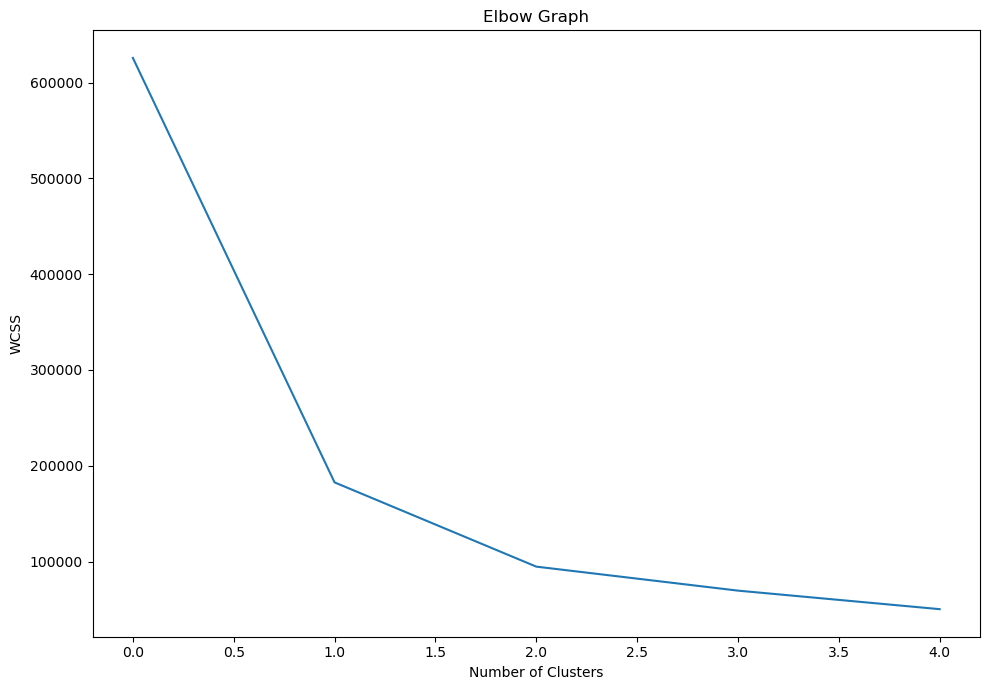

In [28]:
plt.figure(figsize=(10,7))
plt.title('Elbow Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

sns.lineplot(data=wcss,legend=True)
plt.tight_layout()
plt.show()

In [29]:
k_means.labels_

array([3, 4, 1, 1, 1, 4, 2, 0, 4, 3, 2, 3, 3, 1, 4, 4, 1, 3, 4, 4, 1, 2,
       2, 0, 0, 4, 3, 1, 0, 2, 1, 3, 4, 1, 1, 0, 3, 1, 1, 4, 1, 1, 3, 3,
       4, 3, 1, 2, 4, 3, 3, 1, 0, 3, 2, 4, 2, 2, 3, 1, 2, 4, 3, 3, 1, 1,
       0, 3, 4, 1, 3, 2, 4, 3, 2, 3, 1, 4, 2, 3, 0, 0, 0, 2, 2, 1, 1, 4,
       4, 4, 0, 0, 4, 1, 1, 2, 3, 3, 1, 2, 0, 3, 3, 0, 2, 2, 4, 2, 0, 2,
       2, 4, 1, 2, 3, 0, 3, 1, 3, 0, 1, 2, 3, 3, 3, 4, 4, 4, 4, 2, 4, 0,
       1, 0, 2, 4, 1, 4, 0, 4], dtype=int32)

In [30]:
kmeans = KMeans(n_clusters = 2, init="k-means++", random_state=42)

segments = k_means.predict(X_train)

In [31]:
segments

array([3, 4, 1, 1, 1, 4, 2, 0, 4, 3, 2, 3, 3, 1, 4, 4, 1, 3, 4, 4, 1, 2,
       2, 0, 0, 4, 3, 1, 0, 2, 1, 3, 4, 1, 1, 0, 3, 1, 1, 4, 1, 1, 3, 3,
       4, 3, 1, 2, 4, 3, 3, 1, 0, 3, 2, 4, 2, 2, 3, 1, 2, 4, 3, 3, 1, 1,
       0, 3, 4, 1, 3, 2, 4, 3, 2, 3, 1, 4, 2, 3, 0, 0, 0, 2, 2, 1, 1, 4,
       4, 4, 0, 0, 4, 1, 1, 2, 3, 3, 1, 2, 0, 3, 3, 0, 2, 2, 4, 2, 0, 2,
       2, 4, 1, 2, 3, 0, 3, 1, 3, 0, 1, 2, 3, 3, 3, 4, 4, 4, 4, 2, 4, 0,
       1, 0, 2, 4, 1, 4, 0, 4], dtype=int32)

In [32]:
silhouette_score = silhouette_score(segments.reshape(-1,1), labels=k_means.labels_)

In [33]:
silhouette_score

1.0

In [34]:
# from sklearn.manifold import TSNE

In [35]:
# X_embedded = TSNE(n_components=2,learning_rate='auto',max_iter=250,init='random').fit_transform(X_test)

In [36]:
# X_embedded

In [37]:
# embedded_X = pd.DataFrame(X_embedded)
# embedded_X

In [38]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

X2D = pca.fit_transform(X)

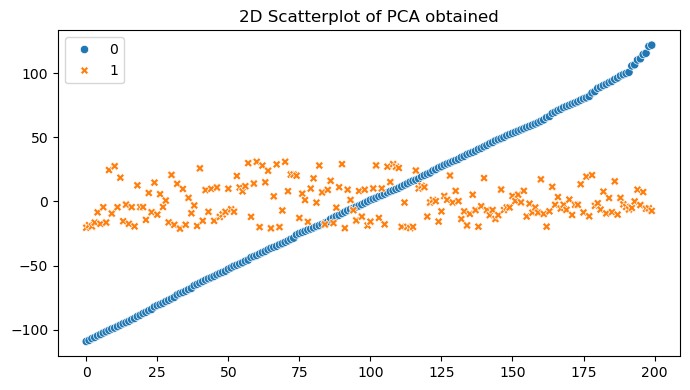

In [39]:
plt.figure(figsize=(7,4))
plt.title('2D Scatterplot of PCA obtained')
sns.scatterplot(X2D)
plt.tight_layout()
plt.show()

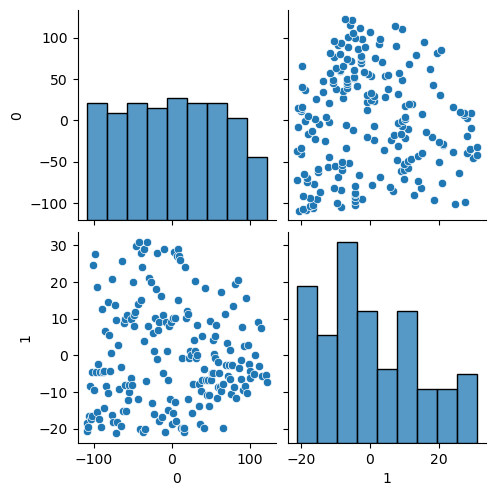

In [40]:
sns.pairplot(pd.DataFrame(X2D))

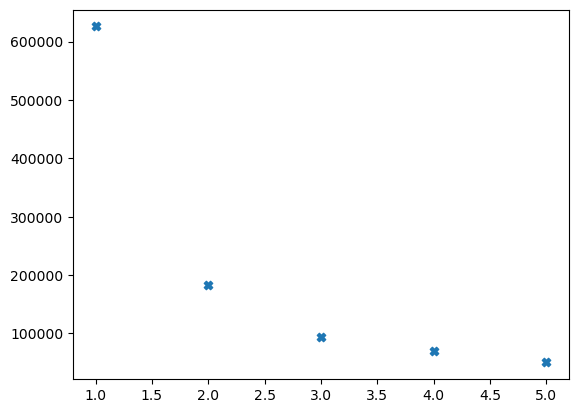

In [41]:
plt.scatter(data=X2D,x=K,y=wcss,marker="X",colorizer='viridis')

In [42]:
customers

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score,cluster_label
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2
2,3,Female,20,16,6,2
3,4,Female,23,16,77,2
4,5,Female,31,17,40,2
...,...,...,...,...,...,...
195,196,Female,35,120,79,3
196,197,Female,45,126,28,3
197,198,Male,32,126,74,3
198,199,Male,32,137,18,3


In [43]:
k_means.labels_.shape

(140,)

In [44]:
k_means.cluster_centers_

array([[187.9       ,  37.35      , 105.55      ],
       [ 20.93548387,  33.58064516,  24.80645161],
       [ 58.19230769,  47.57692308,  44.69230769],
       [150.46875   ,  34.1875    ,  77.6875    ],
       [103.58064516,  41.93548387,  61.67741935]])

In [45]:
k_means.labels_

array([3, 4, 1, 1, 1, 4, 2, 0, 4, 3, 2, 3, 3, 1, 4, 4, 1, 3, 4, 4, 1, 2,
       2, 0, 0, 4, 3, 1, 0, 2, 1, 3, 4, 1, 1, 0, 3, 1, 1, 4, 1, 1, 3, 3,
       4, 3, 1, 2, 4, 3, 3, 1, 0, 3, 2, 4, 2, 2, 3, 1, 2, 4, 3, 3, 1, 1,
       0, 3, 4, 1, 3, 2, 4, 3, 2, 3, 1, 4, 2, 3, 0, 0, 0, 2, 2, 1, 1, 4,
       4, 4, 0, 0, 4, 1, 1, 2, 3, 3, 1, 2, 0, 3, 3, 0, 2, 2, 4, 2, 0, 2,
       2, 4, 1, 2, 3, 0, 3, 1, 3, 0, 1, 2, 3, 3, 3, 4, 4, 4, 4, 2, 4, 0,
       1, 0, 2, 4, 1, 4, 0, 4], dtype=int32)

In [46]:
# embedded_X.shape , segments.shape

In [47]:
# df_embedded_tsne = pd.DataFrame({'x': X_embedded[:, 0],'y': X_embedded[:, 1],'segment': segments})

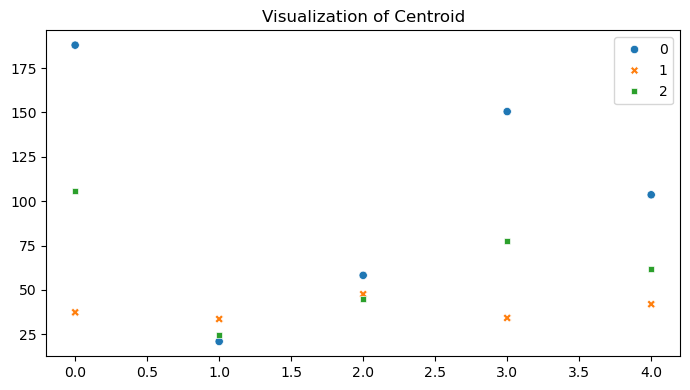

In [48]:
plt.figure(figsize=(7,4))
plt.title('Visualization of Centroid')
sns.scatterplot(k_means.cluster_centers_)
plt.tight_layout()
plt.show()

In [49]:
customers

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score,cluster_label
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2
2,3,Female,20,16,6,2
3,4,Female,23,16,77,2
4,5,Female,31,17,40,2
...,...,...,...,...,...,...
195,196,Female,35,120,79,3
196,197,Female,45,126,28,3
197,198,Male,32,126,74,3
198,199,Male,32,137,18,3
